 ###Black Friday EDA and feature Engineering 
 ##Cleaning and preparing the data for model train

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#importing the dataset
df_train=pd.read_csv('BlackFriday_train.csv')
df_train.shape

(537577, 12)

In [4]:
df_train.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [7]:
#import the testdata
df_test=pd.read_csv('BlackFriday_test.csv')


In [8]:
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [9]:
#combine both train and test data
def append(df1, df2):
    return pd.concat([df1, df2], ignore_index=True)


In [10]:
df = append(df_train, df_test)

In [11]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [12]:
##BAsic code
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1075154 entries, 0 to 1075153
Data columns (total 12 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   User_ID                     1075154 non-null  int64  
 1   Product_ID                  1075154 non-null  object 
 2   Gender                      1075154 non-null  object 
 3   Age                         1075154 non-null  object 
 4   Occupation                  1075154 non-null  int64  
 5   City_Category               1075154 non-null  object 
 6   Stay_In_Current_City_Years  1075154 non-null  object 
 7   Marital_Status              1075154 non-null  int64  
 8   Product_Category_1          1075154 non-null  int64  
 9   Product_Category_2          741182 non-null   float64
 10  Product_Category_3          328556 non-null   float64
 11  Purchase                    1075154 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 98.4+ M

In [16]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,1.075154e+06,1.075154e+06,1.075154e+06,1.075154e+06,741182.000000,328556.000000,1.075154e+06
mean,1.002992e+06,8.082710e+00,4.087973e-01,5.295546e+00,9.842144,12.669840,9.333860e+03
std,1.714392e+03,6.524117e+00,4.916119e-01,3.750699e+00,5.087256,4.124335,4.981020e+03
min,1.000001e+06,0.000000e+00,0.000000e+00,1.000000e+00,2.000000,3.000000,1.850000e+02
25%,1.001495e+06,2.000000e+00,0.000000e+00,1.000000e+00,5.000000,9.000000,5.866000e+03
50%,1.003031e+06,7.000000e+00,0.000000e+00,5.000000e+00,9.000000,14.000000,8.062000e+03
75%,1.004417e+06,1.400000e+01,1.000000e+00,8.000000e+00,15.000000,16.000000,1.207300e+04
max,1.006040e+06,2.000000e+01,1.000000e+00,1.800000e+01,18.000000,18.000000,2.396100e+04


In [19]:
df.drop(['User_ID'],axis=1,inplace=True)

In [20]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [21]:
pd.get_dummies(df['Gender'],drop_first=1)

,M
0,False
1,False
2,False
3,False
4,True
...,...
1075149,True
1075150,True
1075151,True
1075152,True


In [23]:
print(df['Gender'].unique())

['F' 'M']


In [24]:
# Creating the DataFrame
df_small = pd.DataFrame({'Gender': ['F', 'M', 'F', 'M', 'F']})
#Mapping Gender to Numeric Values
df_small['Gender'] = df_small['Gender'].map({'F': 0, 'M': 1})
#Printing the DataFrame
print(df_small)


   Gender
0       0
1       1
2       0
3       1
4       0


In [25]:
# all the unique values show in the gender
print(df['Gender'].unique())
print(df['Gender'].isna().sum())


['F' 'M']
0


In [33]:
df = pd.read_csv("blackFriday_test.csv", na_values=["NAN", "NaN", "", " "])

In [34]:
print(df['Gender'].unique())

['F' 'M']


In [37]:
#handling categoricaal data
import pandas as pd

df['Gender']=df['Gender'].map({'F':0,'M':1})

In [39]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969


In [41]:
##handling categorial feature age
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [43]:
pd.get_dummies(df['Age'],drop_first=True)



,18-25,26-35,36-45,46-50,51-55,55+
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,True
...,...,...,...,...,...,...
537572,False,False,True,False,False,False
537573,False,False,True,False,False,False
537574,False,False,True,False,False,False
537575,False,False,True,False,False,False


In [45]:
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [47]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969


In [49]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
df['Age']=label_encoder.fit_transform(df['Age'])
df['Age'].unique()

array([0, 6, 2, 4, 5, 3, 1], dtype=int64)

In [51]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,1,6,16,C,4+,0,8,NaN,NaN,7969


In [53]:
##fixing categorial data city_categorical
df_city=pd.get_dummies(df['City_Category'],drop_first=True)

In [55]:
df_city.head()

,B,C
0,False,False
1,False,False
2,False,False
3,False,False
4,False,True


In [57]:
pd.concat([df,df_city],axis=1)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1000001,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370,False,False
1,1000001,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200,False,False
2,1000001,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422,False,False
3,1000001,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057,False,False
4,1000002,P00285442,1,6,16,C,4+,0,8,NaN,NaN,7969,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,1,3,16,C,1,0,1,2.0,NaN,11664,False,True
537573,1004737,P00111142,1,3,16,C,1,0,1,15.0,16.0,19196,False,True
537574,1004737,P00345942,1,3,16,C,1,0,8,15.0,NaN,8043,False,True
537575,1004737,P00285842,1,3,16,C,1,0,5,NaN,NaN,7172,False,True


In [59]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,1,6,16,C,4+,0,8,NaN,NaN,7969


In [61]:
##drop the category
df.drop('City_Category',axis=1)

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,2,0,3,NaN,NaN,8370
1,1000001,P00248942,0,0,10,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,2,0,12,NaN,NaN,1422
3,1000001,P00085442,0,0,10,2,0,12,14.0,NaN,1057
4,1000002,P00285442,1,6,16,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,1,3,16,1,0,1,2.0,NaN,11664
537573,1004737,P00111142,1,3,16,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,1,3,16,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,1,3,16,1,0,5,NaN,NaN,7172


In [63]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,1,6,16,C,4+,0,8,NaN,NaN,7969


In [65]:
##Missing values
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [67]:
#focus on replacing missing values
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [69]:
df['Product_Category_2'].value_counts()

Product_Category_2
8.0     63058
14.0    54158
2.0     48481
16.0    42602
15.0    37317
5.0     25874
4.0     25225
6.0     16251
11.0    13945
17.0    13130
13.0    10369
9.0      5591
12.0     5419
10.0     2991
3.0      2835
18.0     2730
7.0       615
Name: count, dtype: int64

In [71]:
df['Product_Category_2'].mode()[0]

8.0

In [73]:
##Replace the missing values with mode
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'])

In [75]:
df['Product_Category_2'].mode()

0    8.0
Name: Product_Category_2, dtype: float64

In [77]:
df['Product_Category_2'].isnull().sum()

166986

In [79]:
## product category 3 replace the mising value
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [81]:
df['Product_Category_3'].value_counts()

Product_Category_3
16.0    32148
15.0    27611
14.0    18121
17.0    16449
5.0     16380
8.0     12384
9.0     11414
12.0     9094
13.0     5385
6.0      4818
18.0     4563
4.0      1840
11.0     1773
10.0     1698
3.0       600
Name: count, dtype: int64

In [83]:
##Replace the missing values with mode
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'])

In [85]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,1,6,16,C,4+,0,8,NaN,NaN,7969


In [87]:
df.shape

(537577, 12)

In [89]:
#stay and current city here
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [91]:
#Replace the '4+' to '4'
df['Stay_In_Current_City_Years'].str.replace('+','')

0         2
1         2
2         2
3         2
4         4
         ..
537572    1
537573    1
537574    1
537575    1
537576    1
Name: Stay_In_Current_City_Years, Length: 537577, dtype: object

In [93]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,1,6,16,C,4+,0,8,NaN,NaN,7969


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  int64  
 3   Age                         537577 non-null  int64  
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 49.2+ MB


In [97]:

# Replace '4+' with 4
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace('4+', 4)

# Now convert the column to int
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)

# Check result
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  int64  
 3   Age                         537577 non-null  int64  
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  int32  
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int32(1), int64(7), object(2)
memory usage: 47.2+ MB


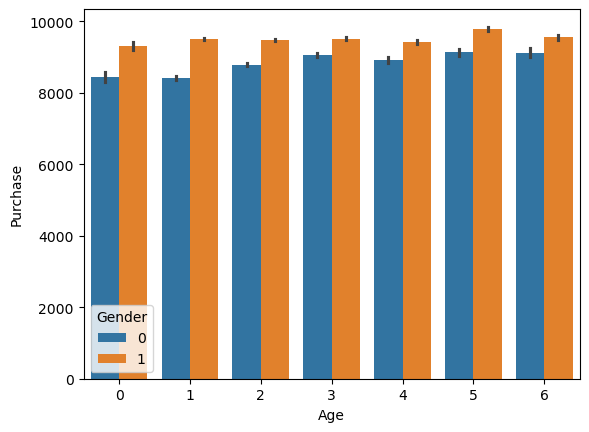

In [99]:
##Visualization

sns.barplot(x='Age', y='Purchase', hue='Gender', data=df)
plt.show()


## purchasing of men is high then women


In [101]:
##visualoiization of the purchase with observation
sns.barplot(x='Occupation', y='Purchase', hue='Gender', data=df)


<Axes: xlabel='Occupation', ylabel='Purchase'>

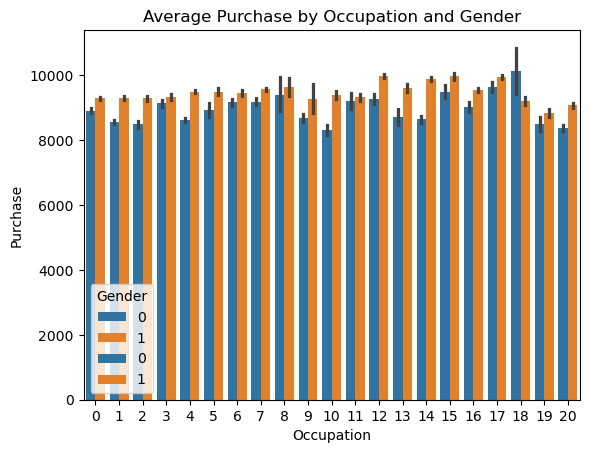

In [102]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Remove spaces from column names
df.columns = df.columns.str.strip()

# Create barplot
sns.barplot(x='Occupation', y='Purchase', hue='Gender', data=df)
plt.title('Average Purchase by Occupation and Gender')
plt.show()

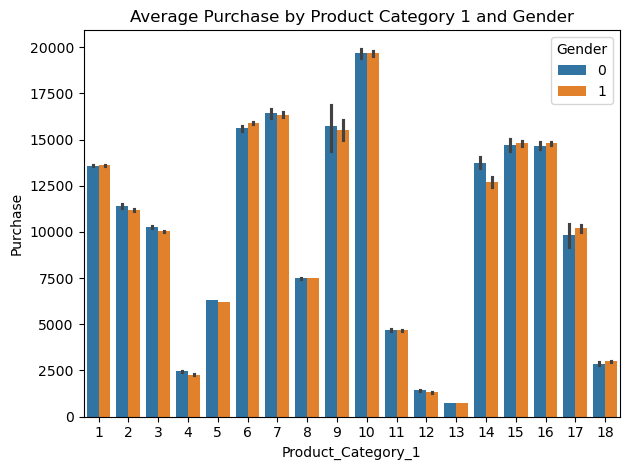

In [103]:
# Strip spaces from column names
df.columns = df.columns.str.strip()

# Plot with correct keyword arguments
sns.barplot(x='Product_Category_1', y='Purchase', hue='Gender', data=df)
plt.title('Average Purchase by Product Category 1 and Gender')
plt.tight_layout()
plt.show()

In [104]:
sns.barplot(x='Product_Category_1', y='Purchase', hue='Gender', data=df)

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

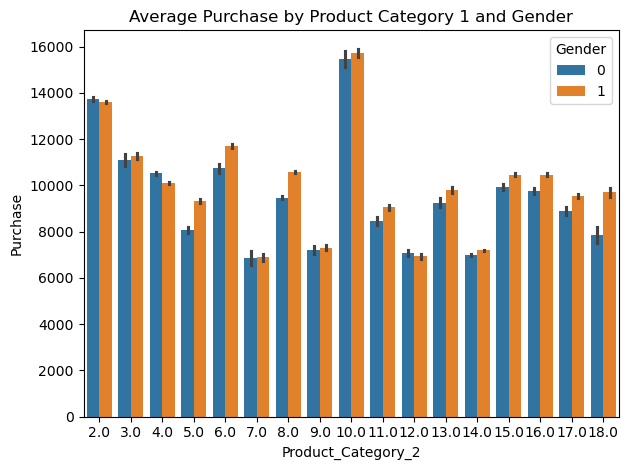

In [126]:
# Strip spaces from column names
df.columns = df.columns.str.strip()

# Plot with correct keyword arguments
sns.barplot(x='Product_Category_2', y='Purchase', hue='Gender', data=df)
plt.title('Average Purchase by Product Category 1 and Gender')
plt.tight_layout()
plt.show()

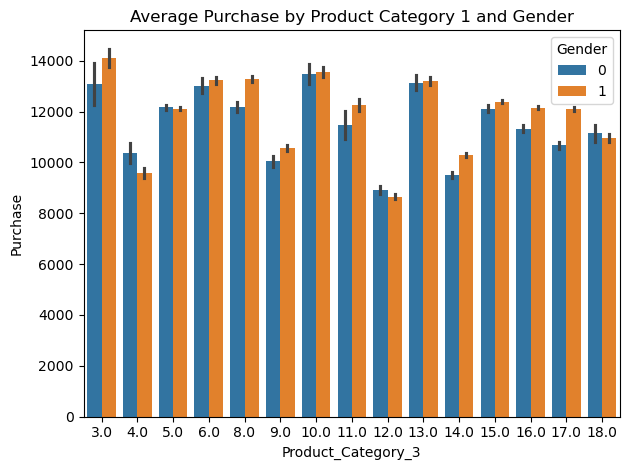

In [127]:
# Strip spaces from column names
df.columns = df.columns.str.strip()

# Plot with correct keyword arguments
sns.barplot(x='Product_Category_3', y='Purchase', hue='Gender', data=df)
plt.title('Average Purchase by Product Category 1 and Gender')
plt.tight_layout()
plt.show()

In [128]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,1,6,16,C,4,0,8,NaN,NaN,7969


In [141]:
## feature scaling

df_test=df[df['Purchase'].isnull()]

In [142]:
df[~df['Purchase'].isnull()]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,1,6,16,C,4,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,1,3,16,C,1,0,1,2.0,NaN,11664
537573,1004737,P00111142,1,3,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,1,3,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,1,3,16,C,1,0,5,NaN,NaN,7172


In [143]:
df_train=df[df['Purchase'].isnull()]

In [144]:
df[~df['Purchase'].isnull()]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,1,6,16,C,4,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,1,3,16,C,1,0,1,2.0,NaN,11664
537573,1004737,P00111142,1,3,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,1,3,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,1,3,16,C,1,0,5,NaN,NaN,7172


In [174]:
X=df_train.drop('Purchase',axis=1)

In [172]:
X.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3


In [176]:
X.shape

(0, 11)

In [178]:
y=df_train['Purchase']

In [180]:
y.shape

(0,)

In [182]:
y

Series([], Name: Purchase, dtype: int64)

In [184]:

# Assuming 'Purchase' is your target variable and df is your DataFrame

# Step 1: Define X (features) by dropping the target column
X = df.drop(columns=['Purchase'])

# Step 2: Define y (target)
y = df['Purchase']
# Step 3: Check the shape of X and y
print("X shape:", X.shape)
print("y shape:", y.shape)

# Step 4: Now split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)


X shape: (537577, 11)
y shape: (537577,)


In [192]:
X_train.drop(columns=['Product_ID'], inplace=True, errors='ignore')
X_test.drop(columns=['Product_ID'], inplace=True, errors='ignore')

In [204]:
##feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


In [208]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,1,6,16,C,4,0,8,NaN,NaN,7969


##train yyour model